# <font color='#54595F'><div style = 'background-color:FAFAFA'><center>Obtaining and analyzing cryptocurrencies with the CoinMarketCap API</center> </div></font>
![](photo.png "Title")

## <font color='#54595F'>Introduction</font>
<font color='#54595F'>In the following Jupyter Notebook I will use the CoinmarketCap API to obtain information about cryptocurrencies and then perform an analysis of them. All the data was obtained around 18hs on the 16th of November 2022.</font>
    
<font color='#54595F'>I will start by showing the results of this study and then the code.</font>

---

#### <div class="alert alert-danger"> Disclaimer: In no way can this analysis be interpreted as financial advise. Investments in cryptocurrencies are risky and everyone should do their own research before investing. </div>





# <font color='#54595F'> Findings</font>

### <font color='#54595F'>JSON</font>

<font color='#54595F'>This is how the json file looks like for the first crypto</font>

![](json.png "Title")

---
### <font color='#54595F'>Dataframe</font>

<font color='#54595F'>This is how part of the Pandas dataframe looks like after working with the json file</font>


![](dataframe.png)

---
### <font color='#54595F'>Descriptive Statistics</font>

<font color='#54595F'> Central tendency, dispersion and shape of the top 50 cryptos by market cap</font>

![](describe.png "Title")

---
### <font color='#54595F'> How many cryptocurrencies have a market cap greater than 1 million dollars? and 10 million dollars? and 100 million dollars? and 1000 million dollars?</font>

There are:
- 1000 cryptocurrencies with a marketcap greater than usd 1 million
- 694 cryptocurrencies with a marketcap greater than usd 10 million
- 196 cryptocurrencies with a marketcap greater than usd 100 million
- 47 cryptocurrencies with a marketcap greater than usd 1 billion

---
### <font color='#54595F'> Top 20 Cryptos bey Market Capitalization</font>

![](top_20.png)

<font color='#54595F'>Bitcoin is much bigger than other cryptocurrencies. To stabilize the variation in the graph and to be able to interpret it in a better way I will use log10.</font>

![](top_20_usd.png)

---
### <font color='#54595F'>24 hours top 15 winners and losers (16-11-2022 18:00)</font>

![](24hs.png)

---
### <font color='#54595F'>7 days top 15 winners and losers (16-11-2022 18:00)</font>

![](7days.png)

---
### <font color='#54595F'>30 days top 15 winners and losers (16-11-2022 18:00)</font>

![](30days.png)

---
### <font color='#54595F'>60 days top 15 winners and losers (16-11-2022 18:00)</font>

![](60days.png)

<font color='#54595F'>Within genres, there should be 32 genres with 100 songs each. But Beatport within its top 100, for some genres, mixes their names, for example, if I enter the website I can see that in the top 100 of DJ Tools there are Acapellas and DJ Tools.</font>

---     

# Importing the libraries to be used in the project

In [1]:
import pandas as pd
from requests import Request, Session
import json
import time
import webbrowser
import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# Obtain the data. Analyse the structure. Create a dataframe which can then be analysed.

### Get the data of the 1000 cryptocurrencies according to marketcap via the CoinMarketCap API 
https://coinmarketcap.com/api/

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # Coinmarketcap API url

parameters = {'limit':'1000'} # API parameters to pass to obtain 1000 cryptos according to market cap

headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '4e5792a5-717a-483d-8370-7883a6b9543b' # API Key (use your own I'll erase mine)
} 

session = Session()
session.headers.update(headers)

response = session.get(url, params=parameters)

info = json.loads(response.text) # Save the json file in the info variable

### Use pprint to get a simple view of what the structure of the json file obtained through the API looks like.

In [3]:
# convert your dictionary to list and get first item in order not to print the 1000 cryptos
pprint.pprint(list(info.items())[1][1][0])

{'circulating_supply': 19209112,
 'cmc_rank': 1,
 'date_added': '2013-04-28T00:00:00.000Z',
 'id': 1,
 'last_updated': '2022-11-16T19:24:00.000Z',
 'max_supply': 21000000,
 'name': 'Bitcoin',
 'num_market_pairs': 9846,
 'platform': None,
 'quote': {'USD': {'fully_diluted_market_cap': 346597140063.74,
                   'last_updated': '2022-11-16T19:24:00.000Z',
                   'market_cap': 317039203922.09576,
                   'market_cap_dominance': 38.3315,
                   'percent_change_1h': -0.56488587,
                   'percent_change_24h': -1.70927856,
                   'percent_change_30d': -15.37843524,
                   'percent_change_60d': -17.56180692,
                   'percent_change_7d': -2.12384046,
                   'percent_change_90d': -29.46382952,
                   'price': 16504.62571732081,
                   'tvl': None,
                   'volume_24h': 34275470341.203785,
                   'volume_change_24h': -10.8342}},
 'self_reported_circu

From what I see in the json I conclude that I am not interested in the 'platform' and I am not interested in the 'tags'. Within them there are nested dictionaries that will complicate the analysis.

However, the nested dictionary 'quote' does contain very important information, such as prices, and I will have to see how to work with it. 

### Create a dictionary called 'a' that contains the 'data' part of the json. Then, create a DataFrame called 'df' from the dictionary 'a'. Delete 'tags'and 'platform' column.

In [4]:
a = info['data']
df = pd.DataFrame.from_dict(a)
del df['tags']
del df['platform']
df.head(2)

,id,name,symbol,slug,num_market_pairs,date_added,max_supply,circulating_supply,total_supply,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote
0,1,Bitcoin,BTC,bitcoin,9846,2013-04-28T00:00:00.000Z,21000000.0,1.920911e+07,1.920911e+07,1,NaN,NaN,NaN,2022-11-16T19:24:00.000Z,"{'USD': {'price': 16504.62571732081, 'volume_24h': 34275470341.203785, 'volume_change_24h': -10.8342, 'percent_change_1h': -0.56488587, 'percent_change_24h': -1.70927856, 'percent_change_7d': -2.12384046, 'percent_change_30d': -15.37843524, 'percent_change_60d': -17.56180692, 'percent_change_90d': -29.46382952, 'market_cap': 317039203922.09576, 'market_cap_dominance': 38.3315, 'fully_diluted_market_cap': 346597140063.74, 'tvl': None, 'last_updated': '2022-11-16T19:24:00.000Z'}}"
1,1027,Ethereum,ETH,ethereum,6201,2015-08-07T00:00:00.000Z,NaN,1.223739e+08,1.223739e+08,2,NaN,NaN,NaN,2022-11-16T19:24:00.000Z,"{'USD': {'price': 1205.3284622616748, 'volume_24h': 12054926374.930193, 'volume_change_24h': -1.8285, 'percent_change_1h': -0.81641717, 'percent_change_24h': -3.44652273, 'percent_change_7d': 1.47374628, 'percent_change_30d': -8.72996456, 'percent_change_60d': -17.6238075, 'percent_change_90d': -35.57750134, 'market_cap': 147500703989.3168, 'market_cap_dominance': 17.8335, 'fully_diluted_market_cap': 147500703989.32, 'tvl': None, 'last_updated': '2022-11-16T19:24:00.000Z'}}"


Now I have the df with all the info and I have to see how to convert the 'quote' column to be able to work with it.

### I'm going to create an empty list 'usd' and then iterate through all the keys in the column 'quote'['USD'] and append them to that list. I will then create a new DataFrame called 'usd_data' from the 'usd' list.

In [5]:
usd = []
for i in df['quote']:
    usd.append(i['USD'])

In [6]:
usd_data = pd.DataFrame(usd)

In [7]:
usd_data.head(3)

,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,tvl,last_updated
0,16504.625717,3.427547e+10,-10.8342,-0.564886,-1.709279,-2.123840,-15.378435,-17.561807,-29.463830,3.170392e+11,38.3315,3.465971e+11,NaN,2022-11-16T19:24:00.000Z
1,1205.328462,1.205493e+10,-1.8285,-0.816417,-3.446523,1.473746,-8.729965,-17.623808,-35.577501,1.475007e+11,17.8335,1.475007e+11,NaN,2022-11-16T19:24:00.000Z
2,0.999271,4.624532e+10,-8.2837,0.000499,0.009998,0.024912,-0.081141,-0.077279,-0.079264,6.601042e+10,7.9832,7.308843e+10,NaN,2022-11-16T19:24:00.000Z


### I now have two dataframes in a format with which I can easily perform an analysis. I have to delete the column 'quote' from the dataframe 'df' and then join it through the index with the dataframe 'usd_data' creating the final dataframe called 'cryptos'. I will save the cryptos dataframe as a csv for future use.

In [8]:
cryptos = pd.merge(df, usd_data, left_index=True, right_index=True)
cryptos.to_csv('cryptos_16.11.22.csv')

In [9]:
cryptos.head(3)

,id,name,symbol,slug,num_market_pairs,date_added,max_supply,circulating_supply,total_supply,cmc_rank,...,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,tvl,last_updated_y
0,1,Bitcoin,BTC,bitcoin,9846,2013-04-28T00:00:00.000Z,21000000.0,1.920911e+07,1.920911e+07,1,...,-1.709279,-2.123840,-15.378435,-17.561807,-29.463830,3.170392e+11,38.3315,3.465971e+11,NaN,2022-11-16T19:24:00.000Z
1,1027,Ethereum,ETH,ethereum,6201,2015-08-07T00:00:00.000Z,NaN,1.223739e+08,1.223739e+08,2,...,-3.446523,1.473746,-8.729965,-17.623808,-35.577501,1.475007e+11,17.8335,1.475007e+11,NaN,2022-11-16T19:24:00.000Z
2,825,Tether,USDT,tether,42231,2015-02-25T00:00:00.000Z,NaN,6.605859e+10,7.314177e+10,3,...,0.009998,0.024912,-0.081141,-0.077279,-0.079264,6.601042e+10,7.9832,7.308843e+10,NaN,2022-11-16T19:24:00.000Z


# Analysing the 'cryptos' dataframe

In [10]:
cryptos.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'max_supply', 'circulating_supply', 'total_supply', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated_x', 'quote', 'price', 'volume_24h',
       'volume_change_24h', 'percent_change_1h', 'percent_change_24h',
       'percent_change_7d', 'percent_change_30d', 'percent_change_60d',
       'percent_change_90d', 'market_cap', 'market_cap_dominance',
       'fully_diluted_market_cap', 'tvl', 'last_updated_y'],
      dtype='object')

 # Analyse the market cap.

###  I will create a dataframe with only the columns 'name' and 'market_cap' and check that there are no missing values.

In [11]:
market_cap_df = cryptos[['name', 'market_cap']]
print(market_cap_df.count())
print(market_cap_df.head())

name          1000
market_cap    1000
dtype: int64
       name    market_cap
0   Bitcoin  3.170392e+11
1  Ethereum  1.475007e+11
2    Tether  6.601042e+10
3  USD Coin  4.448238e+10
4       BNB  4.327097e+10


In [12]:
market_cap_df.isnull().sum(axis = 0)

name          0
market_cap    0
dtype: int64

###  How many cryptocurrencies have a market cap greater than 1 million dollars? and 10 million dollars? and 100 million dollars? and 1000 million dollars?

In [13]:
cap_1m = market_cap_df.query('market_cap > 1000000')
print(cap_1m.count())
print('')
cap_10m = market_cap_df.query('market_cap > 10000000')
print(cap_10m.count())
print('')
cap_100m = market_cap_df.query('market_cap > 100000000')
print(cap_100m.count())
print('')
cap_1000m = market_cap_df.query('market_cap > 1000000000')
print(cap_1000m.count())

name          1000
market_cap    1000
dtype: int64

name          695
market_cap    695
dtype: int64

name          196
market_cap    196
dtype: int64

name          46
market_cap    46
dtype: int64


There are:
- 1000 cryptocurrencies with a market cap greater than usd 1 million.
- 694 cryptocurrencies with a market cap greater than usd 10 million.
- 196 cryptocurrencies with a market cap greater than usd 100 million.
- 47 cryptocurrencies with a market cap greater than usd 1 billion.

 ### How big is Bitcoin compared with the rest of the cryptocurrencies? and Etherum?
 
 #### To answer this question I will plot the market cap for the top 10 coins as a barplot to better visualize this.

First I am going to create a dataframe with the top 10 cryptos by marketcap, to it I am going to add a column with the marketcap %

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,5)

                   market_cap  market_cap_percentage
name                                                
Bitcoin          3.170392e+11              36.866797
Ethereum         1.475007e+11              17.152070
Tether           6.601042e+10               7.675999
USD Coin         4.448238e+10               5.172618
BNB              4.327097e+10               5.031750
Binance USD      2.319223e+10               2.696900
XRP              1.851671e+10               2.153210
Cardano          1.129833e+10               1.313823
Dogecoin         1.122943e+10               1.305810
Polygon          7.779919e+09               0.904685
Polkadot         6.457996e+09               0.750966
Dai              5.889085e+09               0.684810
Solana           5.116114e+09               0.594926
Shiba Inu        4.982208e+09               0.579354
TRON             4.572965e+09               0.531766
Uniswap          4.528665e+09               0.526614
Litecoin         4.112085e+09               0.

Text(0.5, 0, 'Crypto Name')

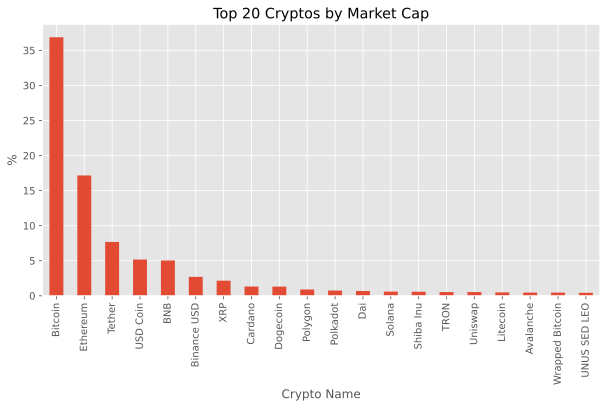

In [15]:
market_cap_top20 = market_cap_df.head(20).set_index('name')
market_cap_top20 = market_cap_top20.assign(market_cap_percentage = lambda i:(i.market_cap / market_cap_df.market_cap.sum())*100)
print(market_cap_top20)

ax = market_cap_top20.market_cap_percentage.plot.bar(title='Top 20 Cryptos by Market Cap')
ax.set_ylabel('%')
ax.set_xlabel('Crypto Name')                                                     

### Bitcoin is much bigger than other cryptocurrencies. To stabilize the variation in the graph and to be able to interpret it in a better way I will use log10.

Text(0, 0.5, 'USD')

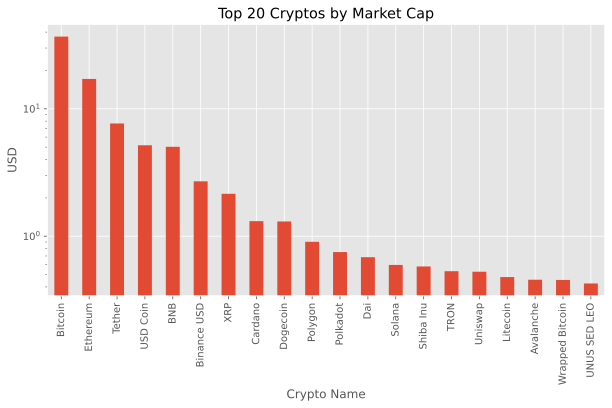

In [16]:
ax = market_cap_top20.market_cap_percentage.plot.bar(title='Top 20 Cryptos by Market Cap', logy=True)
ax.set_xlabel('Crypto Name')
ax.set_ylabel('USD')  


### Let's see which cryptocurrencies performed best and worst in 24 hours, 7 days, 30 days and 60 days from the top 100 cyprtocurrencies by market cap

##### To illustrate this I will create a formula that will plot the top 15 winners and top 15 losers.

In [17]:
# I will work with the following columns:
# 'name','percent_change_24h','percent_change_7d', 'percent_change_30d', 'percent_change_60d'

volatility = cryptos[:50][['name','percent_change_24h','percent_change_7d', 'percent_change_30d', 'percent_change_60d']] 
volatility = volatility.set_index('name')

volatility24hs = volatility.sort_values('percent_change_24h', ascending=False)
volatility7d = volatility.sort_values('percent_change_7d', ascending=False)
volatility30d = volatility.sort_values('percent_change_30d', ascending=False)
volatility60d = volatility.sort_values('percent_change_60d', ascending=False)                                 

In [18]:
def top15_plot(volatility_series, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    ax = volatility_series[:15].plot.bar(color='green', ax=axes[0])
    fig.suptitle(title)
    ax.set_ylabel('% Change')
    ax = volatility_series[-15:].plot.bar(color='red', ax=axes[1])
    return fig, ax

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

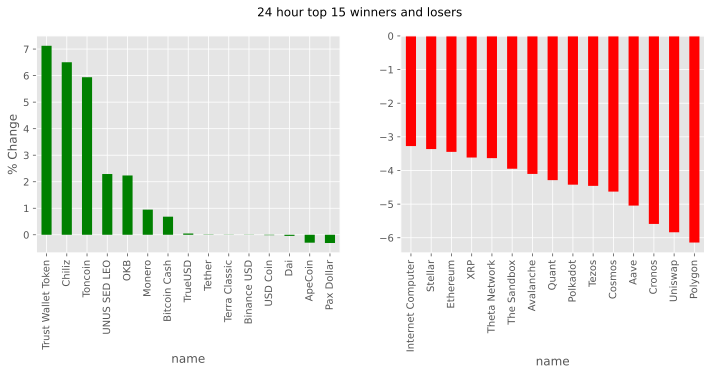

In [19]:
top15_plot(volatility24hs.percent_change_24h, '24 hour top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

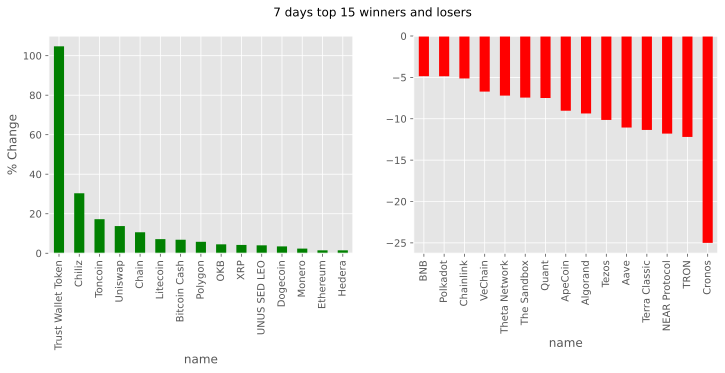

In [20]:
top15_plot(volatility7d.percent_change_7d, '7 days top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

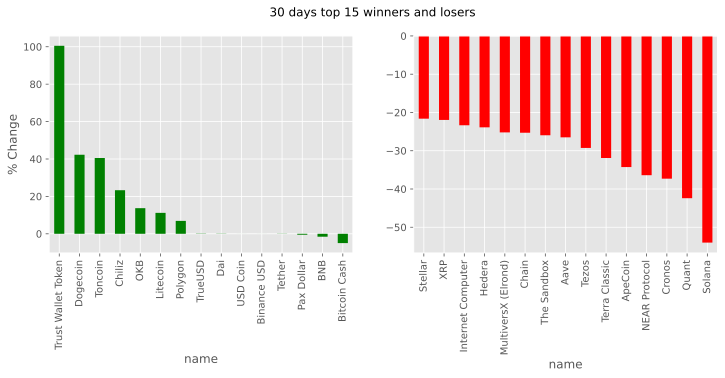

In [21]:
top15_plot(volatility30d.percent_change_30d, '30 days top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

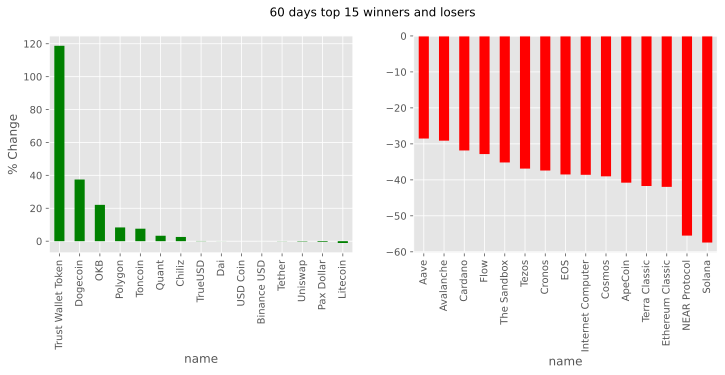

In [22]:
top15_plot(volatility60d.percent_change_60d, '60 days top 15 winners and losers')

## Descriptive statistics that summarize the central tendency, dispersion and shape of the top 50 cryptos by market cap


In [23]:
cryptos[:50][['price','volume_24h', 'percent_change_24h', 'percent_change_7d', 'percent_change_30d', 'percent_change_60d','percent_change_90d', 'market_cap']].describe()

,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,701.638488,2.282278e+09,-1.677283,0.830869,-10.277881,-14.906764,-20.462451,1.562858e+10
std,3259.342275,8.174330e+09,2.872420,17.192243,24.235470,27.120920,32.950258,4.943930e+10
min,0.000009,3.876174e+06,-6.142468,-25.002636,-54.024373,-57.426097,-65.506454,8.162583e+08
25%,0.421334,5.375587e+07,-3.425947,-5.066002,-22.994391,-31.151353,-40.912002,1.077906e+09
50%,1.483286,1.500786e+08,-2.072365,-1.199123,-14.755604,-19.048474,-27.250783,2.218940e+09
75%,13.851058,4.423072e+08,-0.106455,2.123903,-0.764812,-0.273894,-1.114102,5.082637e+09
max,16504.625717,4.624532e+10,7.124828,104.712293,100.515728,118.756005,110.259201,3.170392e+11
